In [ ]:
import numpy as np
import board

n_samples = 10000
board_data = np.zeros((n_samples, 32))
for i in range(n_samples):
    print(i)
    board_data[i] = board.experiment()
np.save('board_data_', board_data)

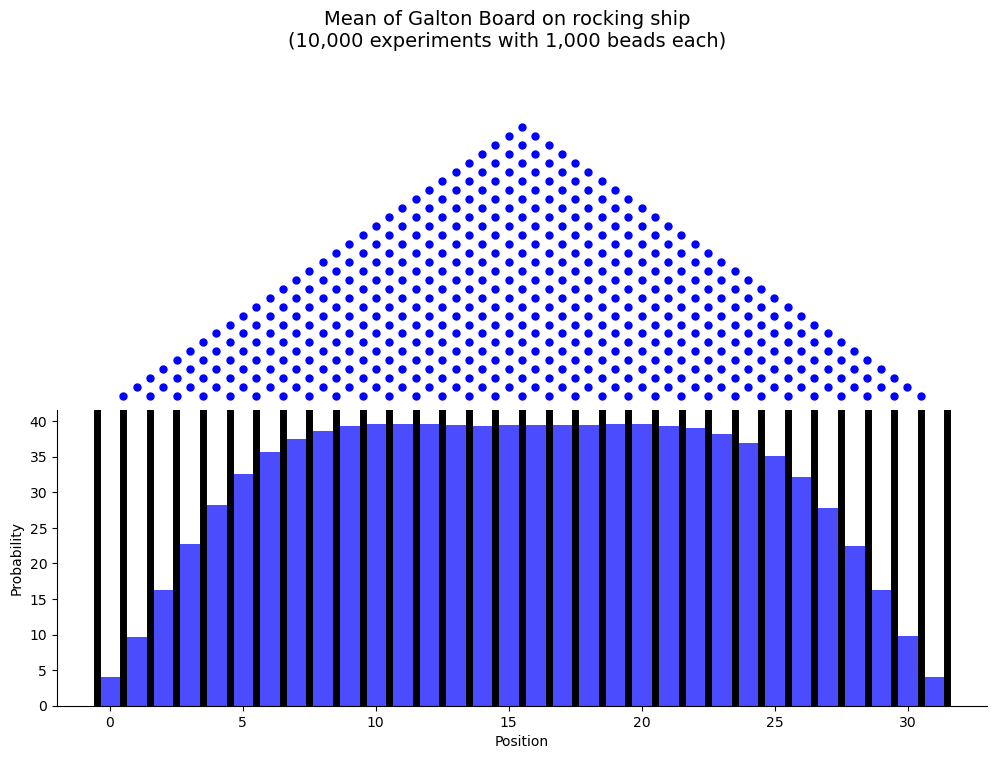

Marbles per experiment: [1000. 1000. 1000. ... 1000. 1000. 1000.]


In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
board_data = np.load('board_data_.npy')

# Data for histogram
positions = range(32)
probabilities = np.mean(board_data, axis=0)

# Create stylized Galton Board
def create_galton_board():
    # Create pins
    rows = 31
    for row in range(rows):
        y = 1 - (row / rows)  # y-position normalized from 1 to 0
        pins_in_row = row + 1
        for pin in range(pins_in_row):
            # Calculate x-position for even distribution
            x = (pin - (pins_in_row-1)/2) / 16 + 0.5 
            plt.plot(x, y, 'o', color='blue', markersize=5)
            
# Create subplots with zero spacing between them
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1]})

# Top subplot (Galton Board)
plt.sca(ax1)
create_galton_board()
plt.axis('off')
plt.xlim(-0.5-1.5/16, 1.5+1.5/16)

# Bottom subplot (Distribution)
plt.sca(ax2)
bars = plt.bar(positions, probabilities, color='blue', alpha=0.7)

# Add vertical lines for bins
for i in range(33):
    plt.axvline(x=i-0.5, color='black', linestyle='-', linewidth=5)

# Formatting
plt.xlabel('Position')
plt.ylabel('Probability')

# no lines on top and right
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust the space between subplots to zero and reduce top margin
plt.subplots_adjust(hspace=0, top=0.85)

# Title for entire figure
plt.suptitle('Mean of Galton Board on rocking ship\n(10,000 experiments with 1,000 beads each)', 
             y=0.98, fontsize=14)

plt.show()

# Print number of marbles per experiment
print("Marbles per experiment:", np.sum(board_data, axis=1))

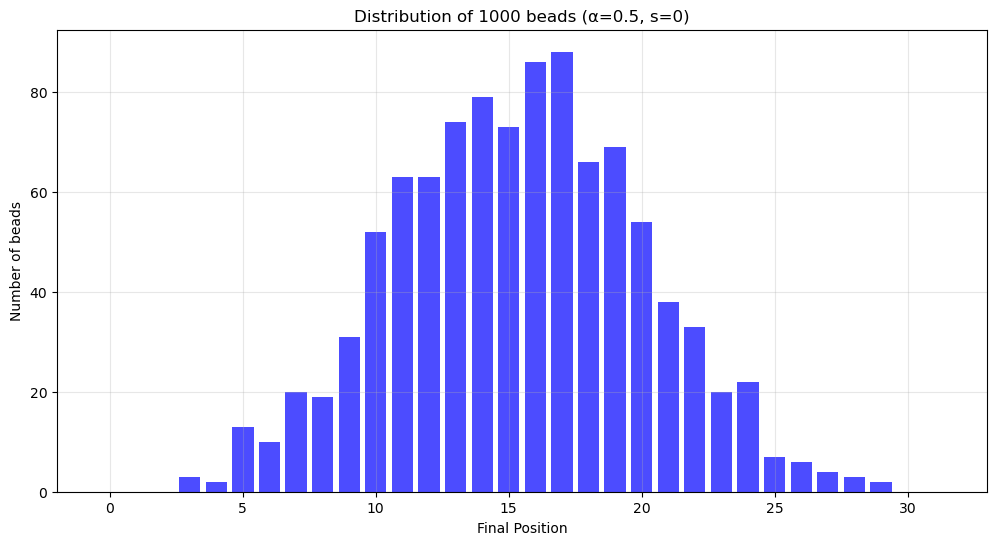

Total beads: 1000
Mean position: 15.39


In [28]:
def simulate_single_bead(alpha, s, n_rows=31):
    """
    Simulates the path of a single bead through the Galton board.
    
    Parameters:
    -----------
    alpha : float
        Memory effect parameter [0, 0.5]
    s : float
        Ship tilt parameter [-0.25, 0.25]
    n_rows : int
        Number of rows in the board (default: 31)
        
    Returns:
    --------
    final_position : int
        The final position of the bead (0 to n_rows)
    """
    current_pos = 0  
    previous_M = 0  
    
    for row in range(n_rows):
        # Calculate probability of going right
        P_right = 0.5 + (alpha * previous_M + s)
        
        # Make the decision: True = right, False = left
        goes_right = np.random.random() < P_right
        
        if goes_right:
            current_pos += 1
            previous_M = 0.5  
        else:
            previous_M = -0.5 
            
    return current_pos

def simulate_multiple_beads(n_beads, alpha, s, n_rows=31):
    """
    Simulates multiple beads through the Galton board.
    
    Parameters:
    -----------
    n_beads : int
        Number of beads to simulate
    alpha : float
        Memory effect parameter [0, 0.5]
    s : float
        Ship tilt parameter [-0.25, 0.25]
    n_rows : int
        Number of rows in the board (default: 31)
        
    Returns:
    --------
    counts : array
        Number of beads in each final position (0 to n_rows)
    """
    positions = [simulate_single_bead(alpha, s, n_rows) for _ in range(n_beads)]
    counts = np.bincount(positions, minlength=n_rows+1)
    return counts

n_beads = 1000
alpha_test = 0.5
s_test = 0

results = simulate_multiple_beads(n_beads, alpha_test, s_test)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(range(len(results)), results, color = 'blue', alpha = 0.7)
plt.title(f'Distribution of {n_beads} beads (α={alpha_test}, s={s_test})')
plt.xlabel('Final Position')
plt.ylabel('Number of beads')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Total beads: {np.sum(results)}")
print(f"Mean position: {np.average(range(len(results)), weights=results):.2f}")